In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
base = '/content/drive/MyDrive/Lab3'
# Single image tree
single_in = os.path.join(base, 'single_image', 'input')
single_out = os.path.join(base, 'single_image', 'output')
# Dataset tree
dataset_in = os.path.join(base, 'dataset', 'input')
dataset_out = os.path.join(base, 'dataset', 'output')


os.makedirs(single_in, exist_ok=True)
os.makedirs(single_out, exist_ok=True)
os.makedirs(dataset_in, exist_ok=True)
os.makedirs(dataset_out, exist_ok=True)

print("Created folders (or already exist):")
print(single_in)
print(single_out)
print(dataset_in)
print(dataset_out)

print("\nNext: Upload a single image into the folder above (single_image/input)")
print("and/or put multiple images into (dataset/input). Then run the next cells.")


Created folders (or already exist):
/content/drive/MyDrive/Lab3/single_image/input
/content/drive/MyDrive/Lab3/single_image/output
/content/drive/MyDrive/Lab3/dataset/input
/content/drive/MyDrive/Lab3/dataset/output

Next: Upload a single image into the folder above (single_image/input)
and/or put multiple images into (dataset/input). Then run the next cells.


In [ ]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

from pathlib import Path

print("Single image input files:")
for p in sorted(Path(single_in).glob('*')):
    print(p.name)

print("\nDataset input files:")
for p in sorted(Path(dataset_in).glob('*')):
    print(p.name)


Single image input files:
flower.jpg

Dataset input files:
Flowers


Using single image: /content/drive/MyDrive/Lab3/single_image/input/flower.jpg


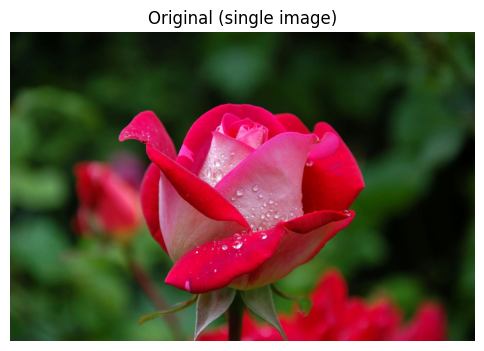

In [ ]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# find first image in the folder
files = list(Path(single_in).glob('*'))
if not files:
    raise SystemExit("No image found in single_image/input — upload an image and re-run this cell.")

img_path = str(files[0])
print("Using single image:", img_path)

# read and convert BGR -> RGB for display
img_bgr = cv2.imread(img_path)
if img_bgr is None:
    raise SystemExit("Failed to read image. Make sure it's a valid image file.")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.title("Original (single image)")
plt.axis('off')
plt.imshow(img_rgb)


Saved Canny result to: /content/drive/MyDrive/Lab3/single_image/output/flower_canny.png


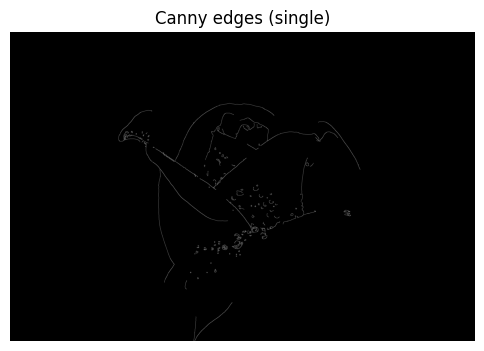

In [ ]:
# Canny edge detection on the single image and save result
import cv2
import os

# convert to gray, blur, then Canny
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 1.4)
# thresholds are simple defaults; you can tune
edges = cv2.Canny(blur, 50, 150)

# save to output
out_path = os.path.join(single_out, Path(img_path).stem + '_canny.png')
cv2.imwrite(out_path, edges)
print("Saved Canny result to:", out_path)

# show
plt.figure(figsize=(6,6))
plt.title("Canny edges (single)")
plt.axis('off')
plt.imshow(edges, cmap='gray')


In [ ]:
# Check if dataset images are accessible
from pathlib import Path

dataset_in = '/content/drive/MyDrive/Lab3/dataset/input'

files = sorted(Path(dataset_in).glob('*'))
if not files:
    print("No images found in:", dataset_in)
    print("Upload a few images into this folder in your Google Drive.")
else:
    print(f" Found {len(files)} image(s) in dataset/input:")
    for f in files:
        print("-", f.name)


 Found 1 image(s) in dataset/input:
- Flowers


In [ ]:
# Canny Edge Detection for Dataset (including images in subfolders)
import cv2, os, numpy as np
from tqdm import tqdm
from pathlib import Path

dataset_in = '/content/drive/MyDrive/Lab3/dataset/input'
dataset_out = '/content/drive/MyDrive/Lab3/dataset/output'
os.makedirs(dataset_out, exist_ok=True)

# Recursively find all jpg/png/jpeg images in dataset and subfolders
files = sorted(Path(dataset_in).rglob('*.[pj][pn]g'))  # matches .jpg/.jpeg/.png
if not files:
    print("No images found. Please upload images to dataset/input or its subfolders.")
else:
    for p in tqdm(files, desc="Performing Canny Edge Detection"):
        img = cv2.imread(str(p))
        if img is None:
            print("Skipped:", p.name)
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur
        blur = cv2.GaussianBlur(gray, (5,5), 1.4)

        # Canny edge detection
        edges = cv2.Canny(blur, 50, 150)

        # Save result — keep folder structure inside output
        relative_path = p.relative_to(dataset_in)
        out_file = os.path.join(dataset_out, relative_path.parent.name + '_' + p.stem + '_canny.png')
        cv2.imwrite(out_file, edges)

    print("\n Canny Edge Detection completed for all images (including subfolders).")
    print("Results saved to:", dataset_out)


Performing Canny Edge Detection: 100%|██████████| 733/733 [01:41<00:00,  7.19it/s]


 Canny Edge Detection completed for all images (including subfolders).
Results saved to: /content/drive/MyDrive/Lab3/dataset/output


In [ ]:
# Show sample output images
import matplotlib.pyplot as plt
sample = list(Path(dataset_out).glob('*_canny.png'))

if not sample:
    print("No processed images yet.")
else:
    for s in sample[:3]:
        img = cv2.imread(str(s), cv2.IMREAD_GRAYSCALE)
        plt.figure(figsize=(5,5))
        plt.title(s.name)
        plt.axis('off')
        plt.imshow(img, cmap='gray')


No processed images yet.


Saved Sobel result to: /content/drive/MyDrive/Lab3/single_image/output/flower_sobel.png


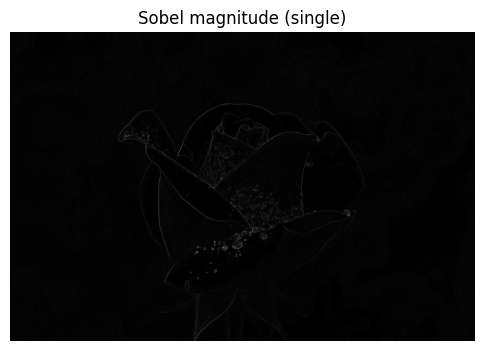

In [ ]:
# Sobel edge detection on single image and save result
import cv2
import numpy as np
import os

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# Sobel X and Y
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
# magnitude
mag = np.sqrt(sobelx**2 + sobely**2)
# normalize to 0-255 and convert to uint8
mag = np.uint8(255 * (mag / (mag.max() + 1e-8)))

out_path = os.path.join(single_out, Path(img_path).stem + '_sobel.png')
cv2.imwrite(out_path, mag)
print("Saved Sobel result to:", out_path)

plt.figure(figsize=(6,6))
plt.title("Sobel magnitude (single)")
plt.axis('off')
plt.imshow(mag, cmap='gray')


In [ ]:
# Sobel Edge Detection for Dataset (including images in subfolders)
import cv2, os, numpy as np
from tqdm import tqdm
from pathlib import Path

dataset_in = '/content/drive/MyDrive/Lab3/dataset/input'
dataset_out = '/content/drive/MyDrive/Lab3/dataset/output'
os.makedirs(dataset_out, exist_ok=True)

# Find all images recursively (.jpg, .jpeg, .png)
files = sorted(Path(dataset_in).rglob('*.[pj][pn]g'))

if not files:
    print(" No images found in dataset/input or its subfolders.")
else:
    for p in tqdm(files, desc="Performing Sobel Edge Detection"):
        img = cv2.imread(str(p))
        if img is None:
            print("Skipped:", p.name)
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Sobel X and Y
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

        # Compute gradient magnitude
        mag = np.sqrt(sobelx**2 + sobely**2)
        mag = np.uint8(255 * (mag / (mag.max() + 1e-8)))  # normalize to 0-255

        # Save result — include subfolder name to avoid conflicts
        relative_path = p.relative_to(dataset_in)
        out_file = os.path.join(dataset_out, relative_path.parent.name + '_' + p.stem + '_sobel.png')
        cv2.imwrite(out_file, mag)

    print("\n Sobel Edge Detection completed for all images.")
    print("Results saved to:", dataset_out)


Performing Sobel Edge Detection: 100%|██████████| 733/733 [02:09<00:00,  5.64it/s]


 Sobel Edge Detection completed for all images.
Results saved to: /content/drive/MyDrive/Lab3/dataset/output


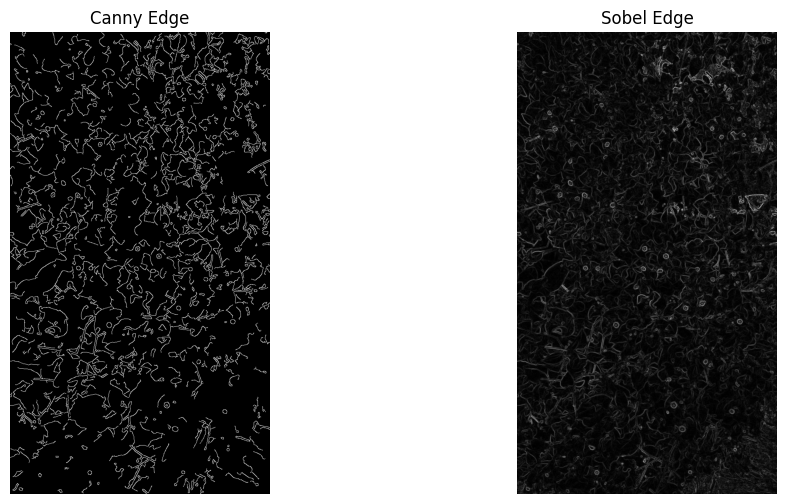

In [ ]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

dataset_out = '/content/drive/MyDrive/Lab3/dataset/output'

# Pick a sample image (first one found)
canny_files = sorted(Path(dataset_out).glob('*_canny.png'))
sobel_files = sorted(Path(dataset_out).glob('*_sobel.png'))

if not canny_files or not sobel_files:
    print(" Canny or Sobel images not found. Run edge detection first.")
else:
    # Take first image for comparison
    canny_img = cv2.imread(str(canny_files[0]), cv2.IMREAD_GRAYSCALE)
    sobel_img = cv2.imread(str(sobel_files[0]), cv2.IMREAD_GRAYSCALE)

    # Display side by side
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.title("Canny Edge")
    plt.axis('off')
    plt.imshow(canny_img, cmap='gray')

    plt.subplot(1,2,2)
    plt.title("Sobel Edge")
    plt.axis('off')
    plt.imshow(sobel_img, cmap='gray')

    plt.show()
